In [90]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm

In [91]:
df = pd.read_csv('monthly_count.csv')

In [92]:
crime_M = df
crime_M.rename(columns={'CMPLNT_FR_DT': 'Month'}, inplace = True)
crime_M.set_index('Month', inplace = True)
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


In [93]:
# crime_M = df.groupby(['CMPLNT_FR_DT'])['Count'].sum()

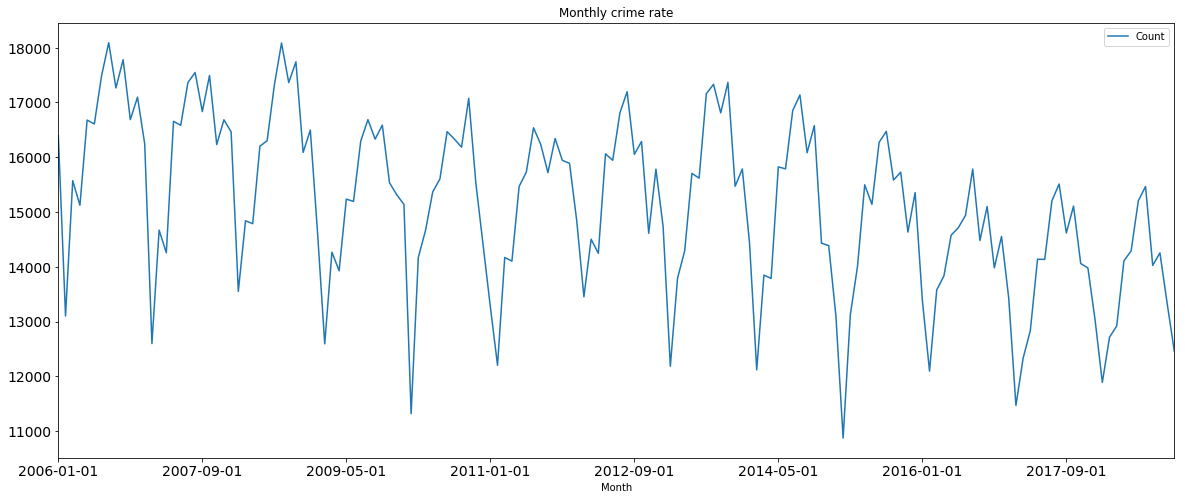

In [94]:
crime_M.plot(figsize=(20,8), title= 'Monthly crime rate', fontsize=14)

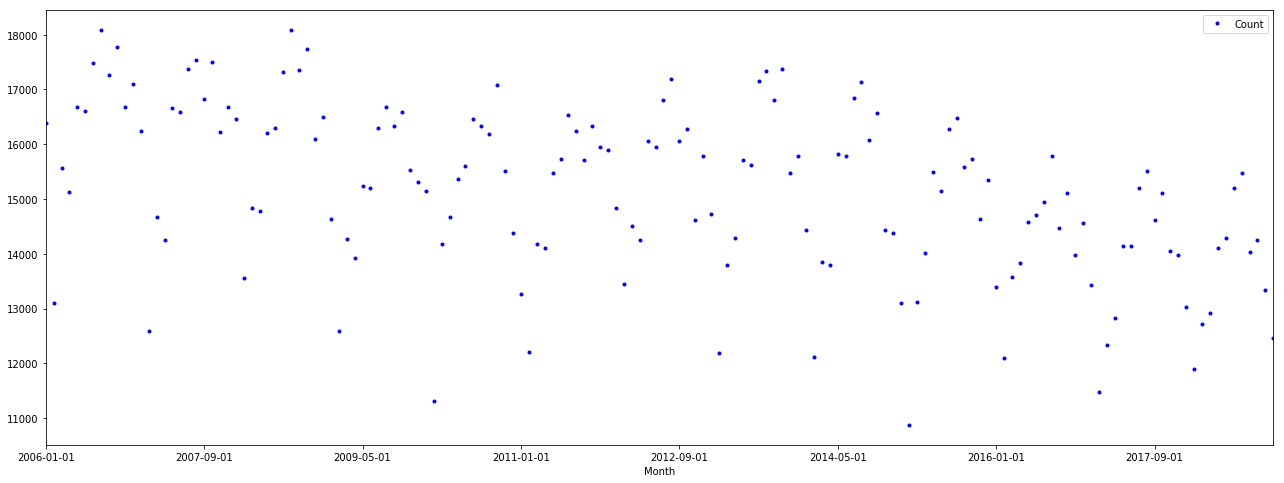

In [95]:
crime_M.plot(figsize = (22,8), style = 'b.')
plt.show()

<Figure size 432x288 with 0 Axes>

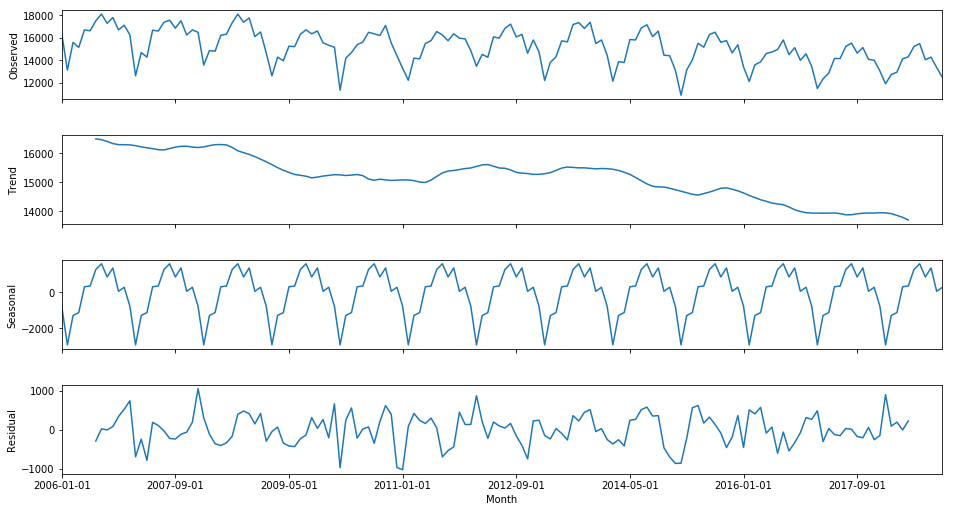

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(crime_M , freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

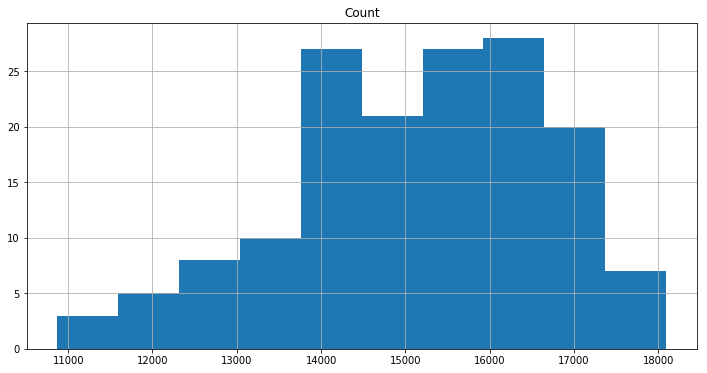

In [97]:
# Plot a histogram of the temperature dataset
crime_M.hist(figsize = (12,6))
plt.show()

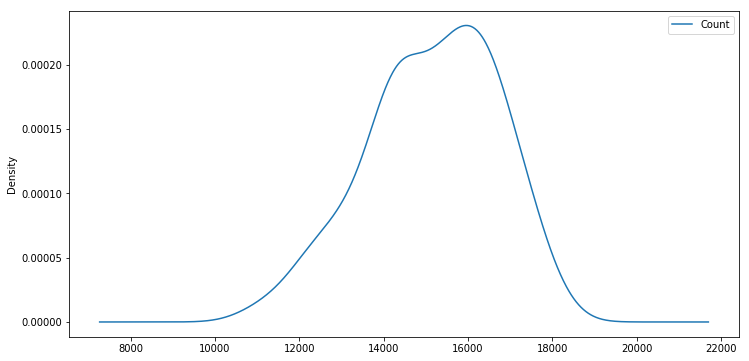

In [98]:
# Plot a density plot for temperature dataset
crime_M.plot(kind='kde', figsize = (12,6))
plt.show()

In [99]:
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


In [100]:
type(crime_M)

pandas.core.frame.DataFrame

In [124]:
crime_M.index = pd.to_datetime(
  crime_M.index, errors='coerce', infer_datetime_format = True)

In [125]:
crime_M.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', length=156, freq=None)

In [126]:
year_groups = crime_M.groupby(pd.Grouper(freq ='A'))
crime_annual = pd.DataFrame()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a9b0320>,
      dtype=object)

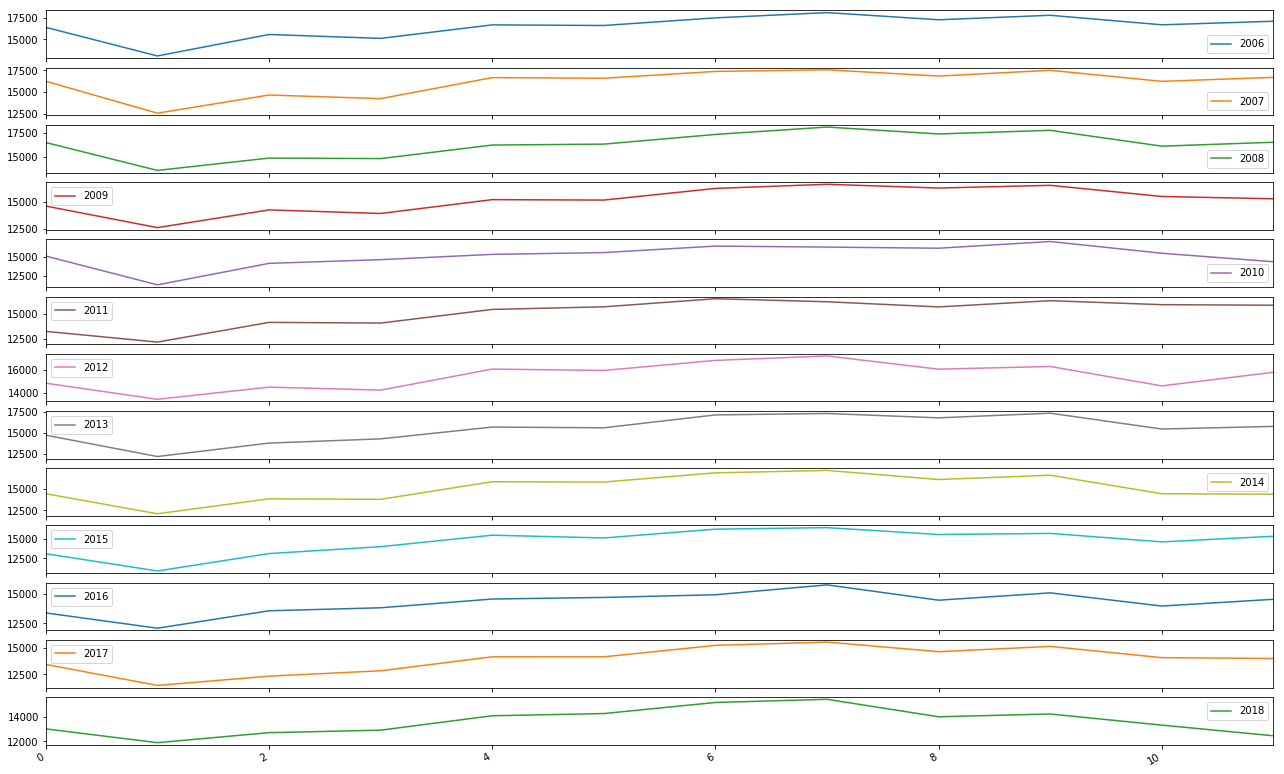

In [127]:
for yr, group in year_groups:
    crime_annual[yr.year] = group.values.ravel()
# Plot the yearly groups as subplots
crime_annual.plot(figsize = (22,15), subplots=True, legend=True)


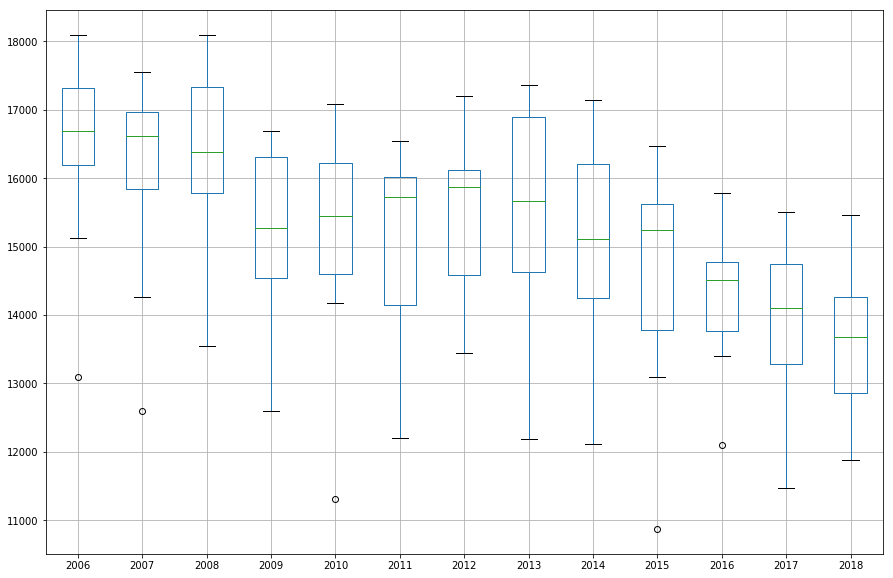

In [137]:
# Generate a box and whiskers plot for annual crime dataframe
crime_annual.boxplot(figsize = (15,10))
plt.show()

In [131]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

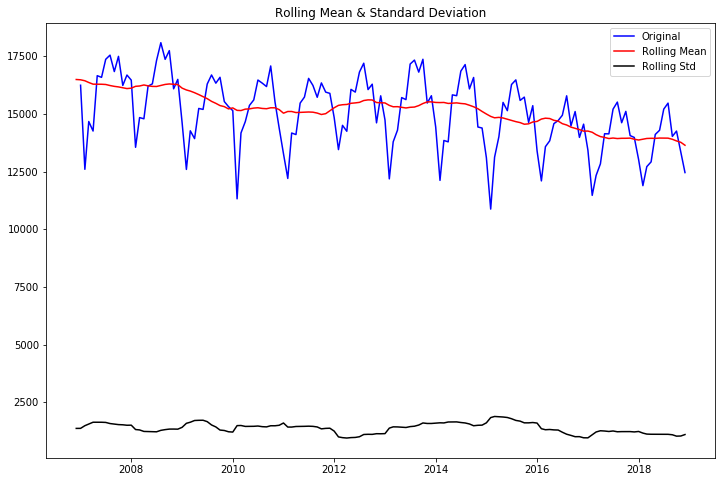

Results of Dickey-Fuller Test:
Test Statistic                  -0.437883
p-value                          0.903579
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [132]:
#test the stationarity of the untransformed dataset
test_stationarity(crime_M.Count, 12)

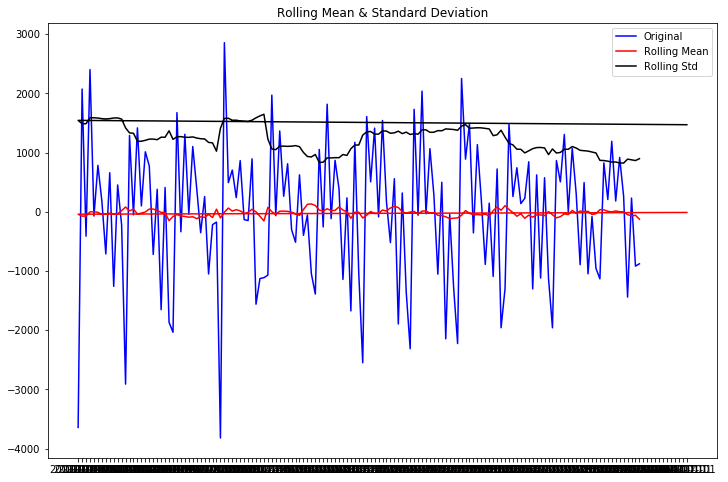

Results of Dickey-Fuller Test:
Test Statistic                -6.031277e+00
p-value                        1.416046e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.430000e+02
Critical Value (1%)           -3.476927e+00
Critical Value (5%)           -2.881973e+00
Critical Value (10%)          -2.577665e+00
dtype: float64


In [133]:
#test the stationarity of the untransformed dataset
test_stationarity(crime_M_diff.Count, 12)

In [130]:
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


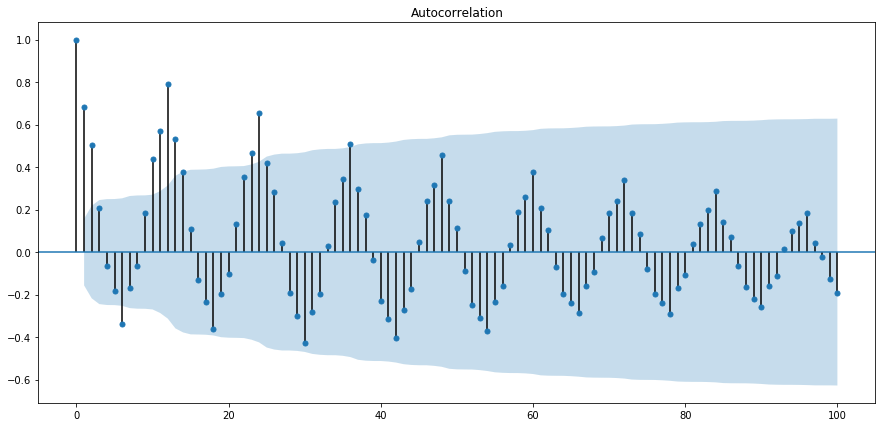

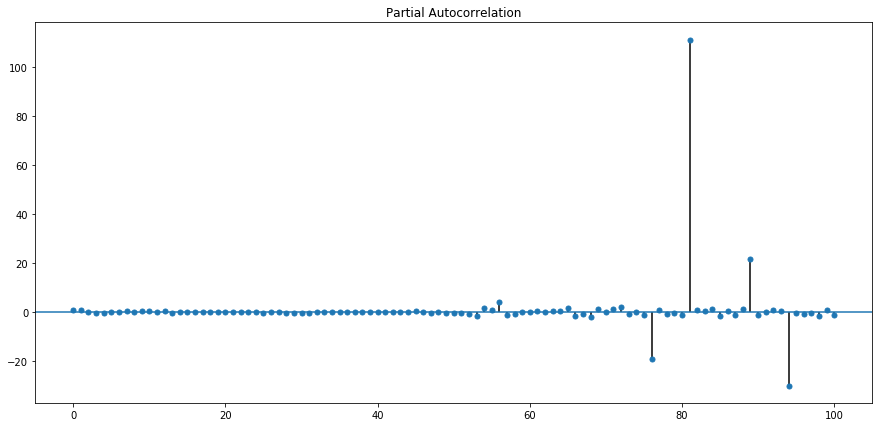

In [138]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams


fig, ax = plt.subplots(figsize=(15,7))
plot_acf(crime_M,ax=ax, lags=100);

fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(crime_M,ax=ax, lags=100);

In [108]:
crime_M_diff= crime_M.diff().dropna()
crime_M_diff.head()

,Count
Month,
2006-02-01,-3291.0
2006-03-01,2471.0
2006-04-01,-449.0
2006-05-01,1556.0
2006-06-01,-72.0


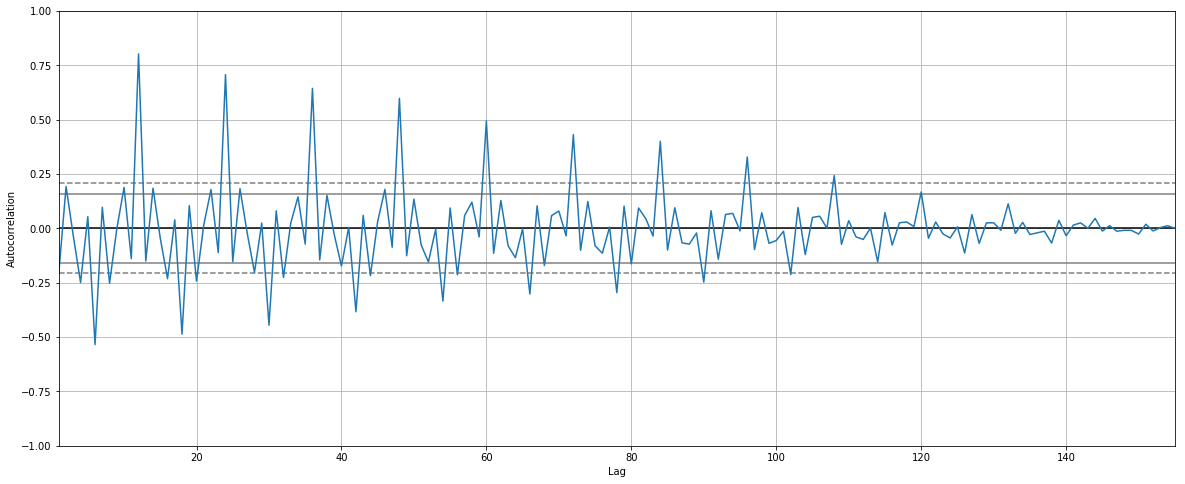

In [113]:
plt.figure(figsize=(20,8))
pd.plotting.autocorrelation_plot(crime_M_diff)

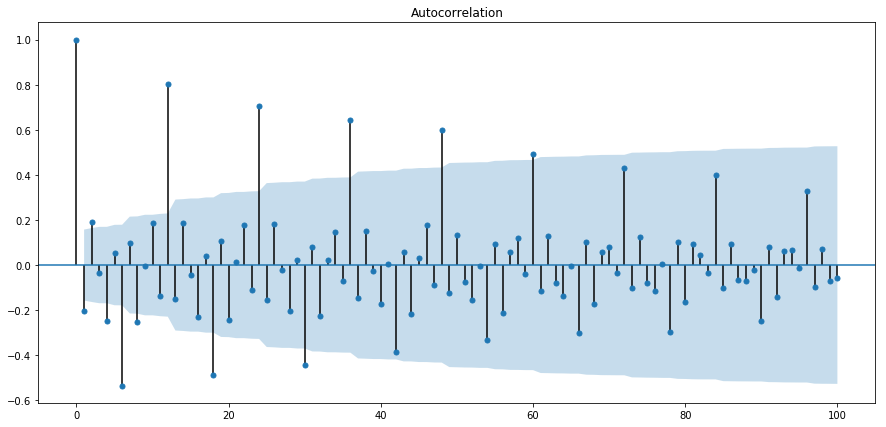

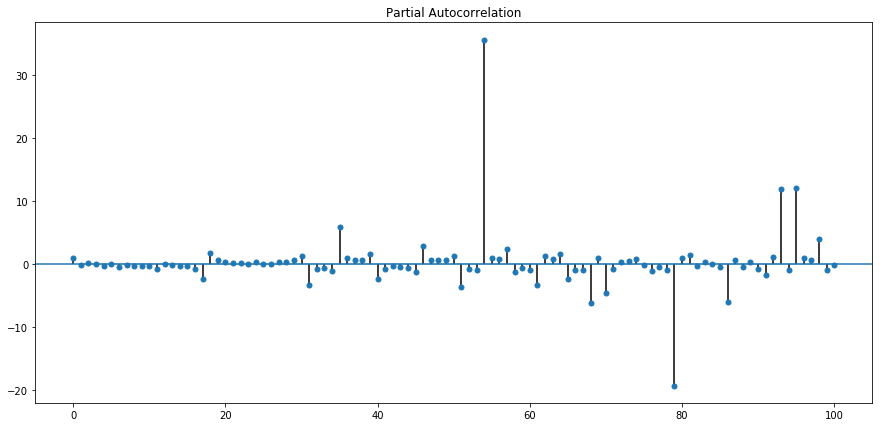

In [136]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams


fig, ax = plt.subplots(figsize=(15,7))
plot_acf(crime_M_diff,ax=ax, lags=100);

fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(crime_M_diff,ax=ax, lags=100);

In [153]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [154]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [185]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(crime_M_diff,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2619.5455055197845
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =2325.1255717883305
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =2237.9824638450973
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =2006.7908576310647
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =2239.4044077189756
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =2183.882536794079
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =2046.1550445224136
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =2008.790811314713
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =2597.494798689585
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =2304.1060614288845
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =2206.220414224871
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1975.4080396167487
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =2227.5121933525884
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =2155.6780411750156
ARIMA (0, 

In [156]:
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1971.5601647875887


In [205]:
mod = sm.tsa.statespace.SARIMAX(crime_M_diff, trend='ct', order=(1, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  155
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1088.021
Date:                            Thu, 30 May 2019   AIC                           2188.041
Time:                                    17:12:30   BIC                           2205.776
Sample:                                02-01-2006   HQIC                          2195.248
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0830      3.283      0.330      0.742      -5.352       7.518
drift         -0.0177      0.039   

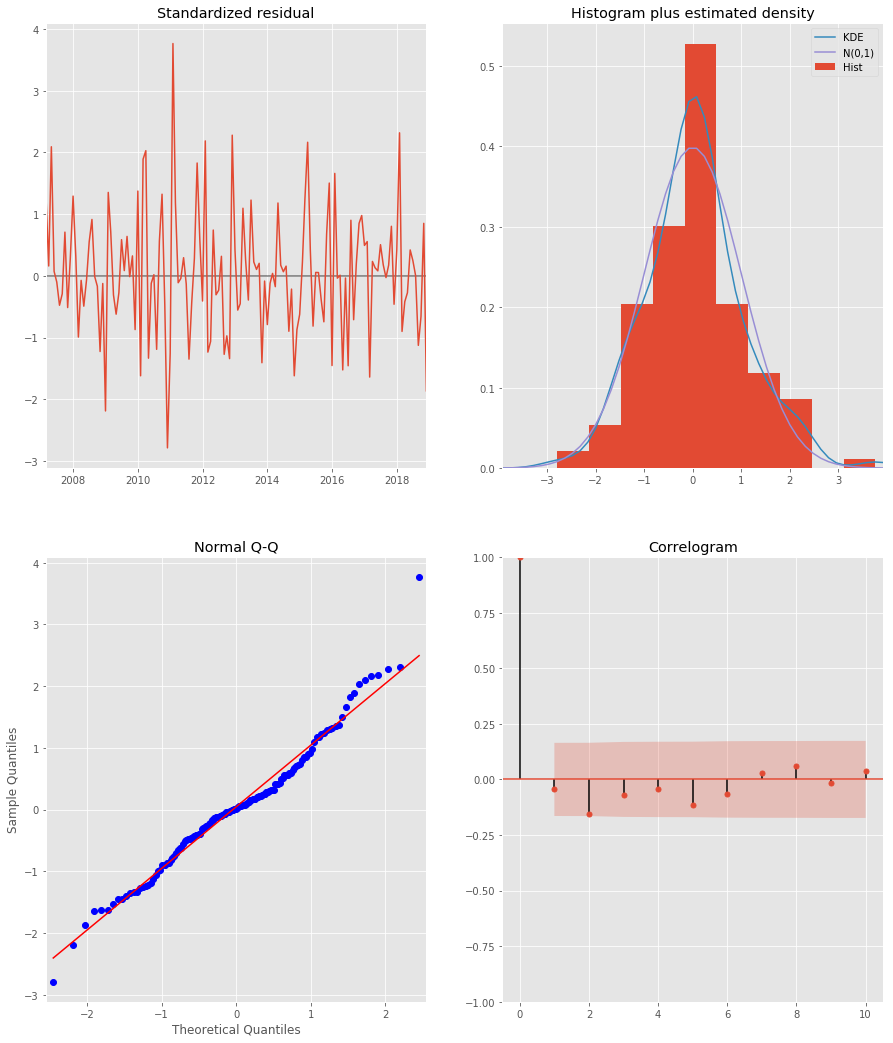

In [204]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()



In [207]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(crime_M_diff,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary())


                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  155
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -981.780
Date:                            Thu, 30 May 2019   AIC                           1971.560
Time:                                    17:14:18   BIC                           1982.968
Sample:                                02-01-2006   HQIC                          1976.195
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2970      0.081     -3.665      0.000      -0.456      -0.138
ma.L1         -0.9996      3.700   

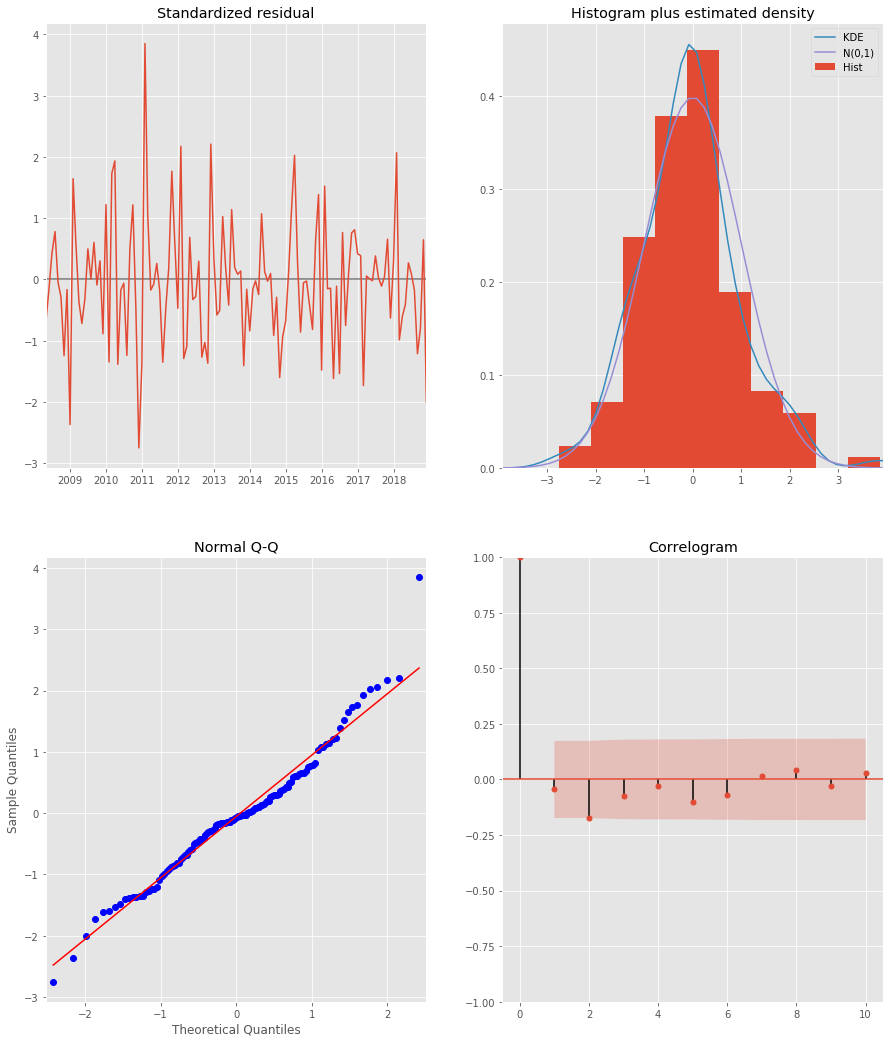

In [197]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

#  KDE line follows closely with the N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). 
#  This is a good indication that the residuals are normally distributed.
# The distribution of residuals (blue dots) are following the linear trend with some slight random pattern but 
# we can consider the residuals as almost normally distributed.

# The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. 
# This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series
# residuals have low correlation with lagged versions of itself.



In [208]:
crime_M

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679
2006-06-01,16607
2006-07-01,17484
2006-08-01,18092
2006-09-01,17266


In [229]:
training_data = crime_M.loc[crime_M.index < "2015-01-01"]
validation_set = crime_M.loc[crime_M.index >= "2015-01-01"]

In [236]:
print(len(training_data))
print(len(validation_set))

108
48


In [ ]:
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [234]:
# crime_M_diff['forecast'] = res.predict(start = 54, end= 72, dynamic= False)  
# crime_M_diff[['Count', 'forecast']].plot(figsize=(16, 12)) 

In [240]:
Crime_x = pd.read_csv('final.csv')

In [242]:
Crime_x.head()

,Month,Count,Unem_R,Mean_Temp,Over70,Days
0,2006-01-01,16392,5.1,45.033226,0.0,31
1,2006-02-01,13101,5.3,40.423214,0.0,28
2,2006-03-01,15572,5.0,49.034516,1.0,31
3,2006-04-01,15123,4.6,62.382333,7.0,30
4,2006-05-01,16679,4.5,69.665806,12.0,31
